# **1. Perkenalan Dataset**


Dataset ini berisi informasi mendetail tentang perilaku transaksi keuangan dan pola aktivitas finansial, yang sangat berguna untuk analisis deteksi penipuan (fraud detection) dan identifikasi anomali. Dengan total 2.512 sampel transaksi, dataset ini mencakup berbagai atribut transaksi, demografi pelanggan, serta pola penggunaan yang dapat memberikan wawasan mendalam terhadap perilaku keuangan.

# **2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# **3. Memuat Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/bank_transactions_data_2.csv')

In [ ]:
print(df.shape)
print(df.head())

(2512, 16)
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor           

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
print(df.describe)

<bound method NDFrame.describe of      TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit   

In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(0)

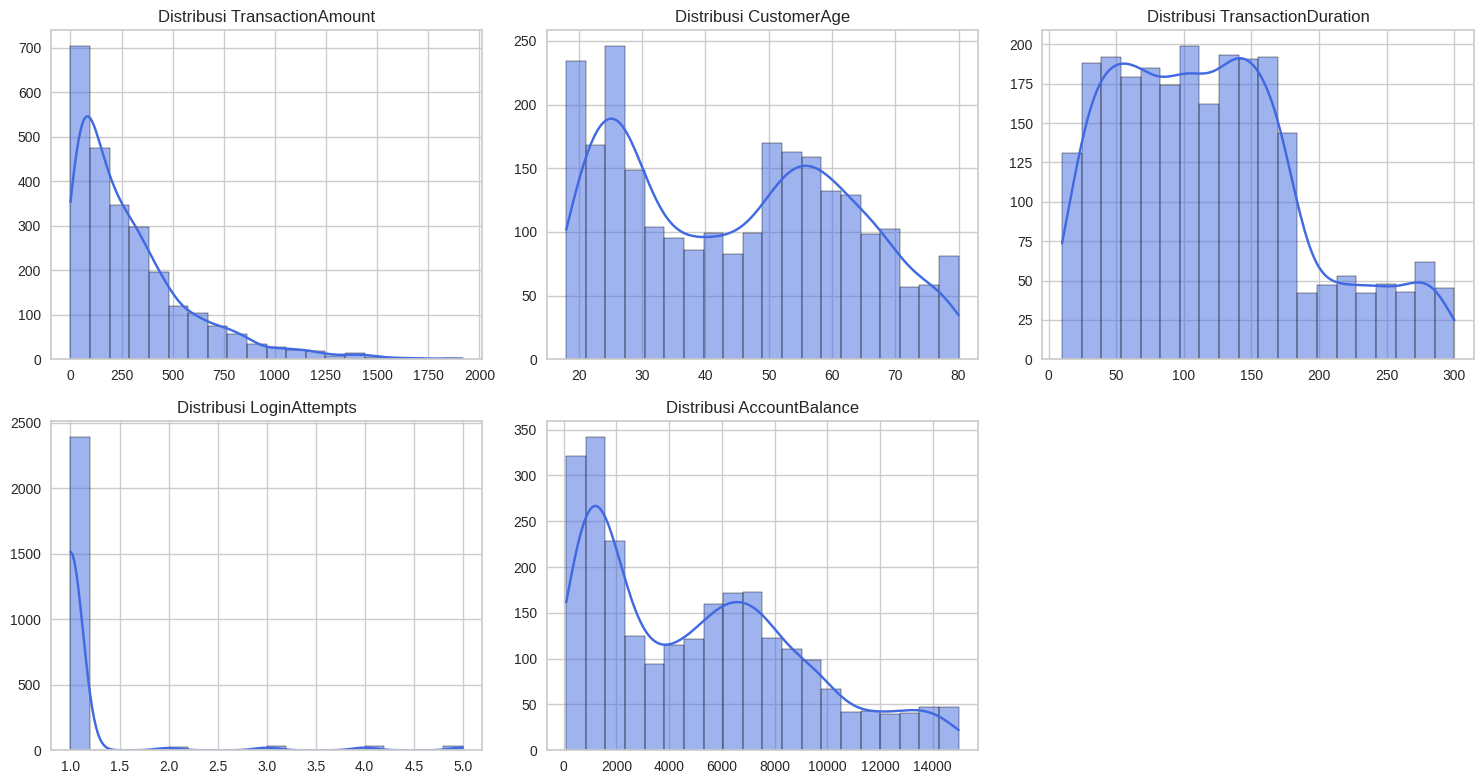

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns[:5]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color="royalblue", edgecolor="black")
    axes[i].set_title(f'Distribusi {col}', fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(len(numeric_columns), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

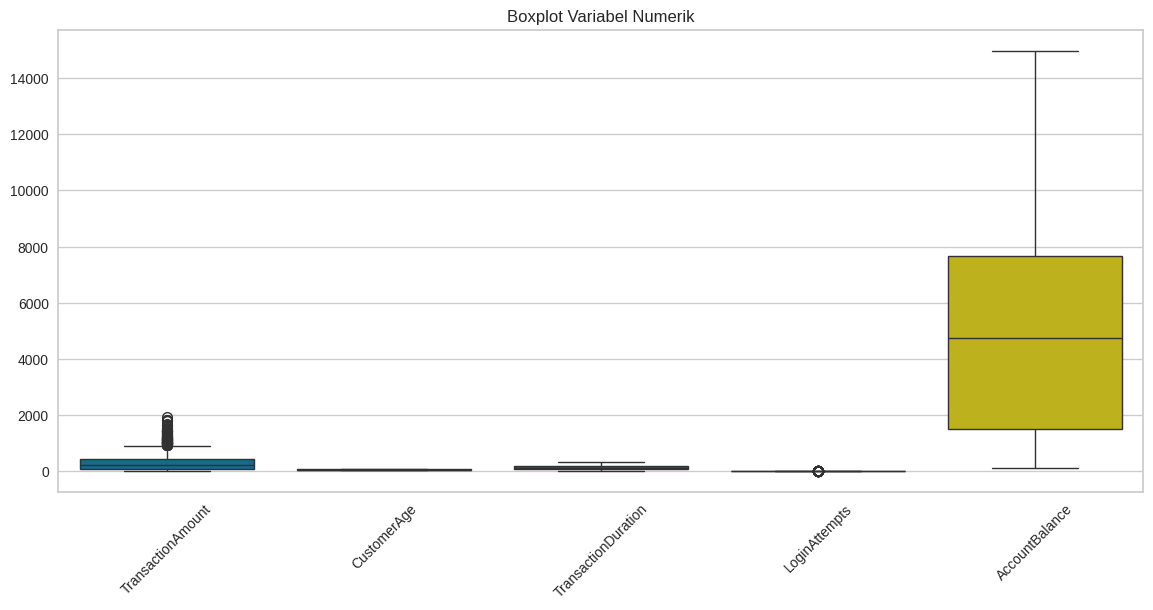

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Boxplot Variabel Numerik")
plt.xticks(rotation=45)
plt.show()

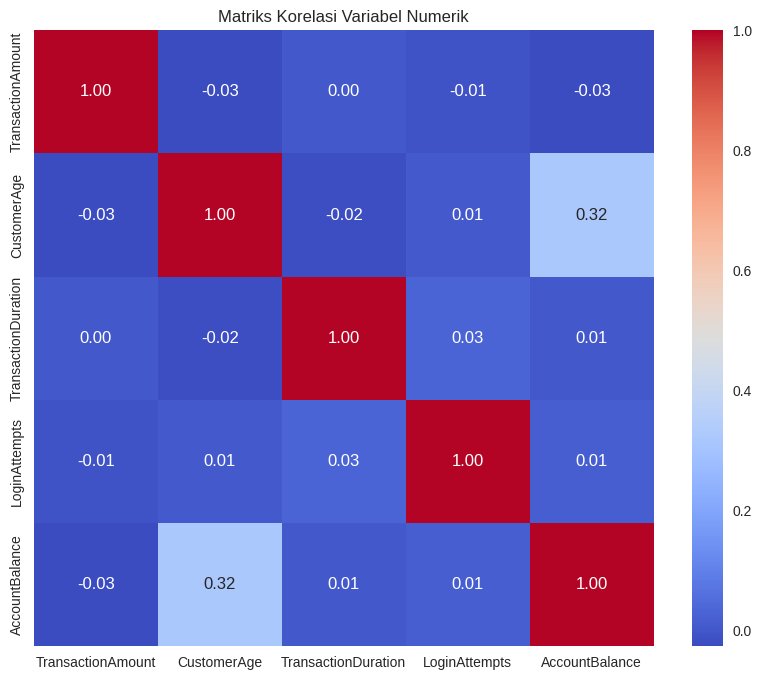

In [ ]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

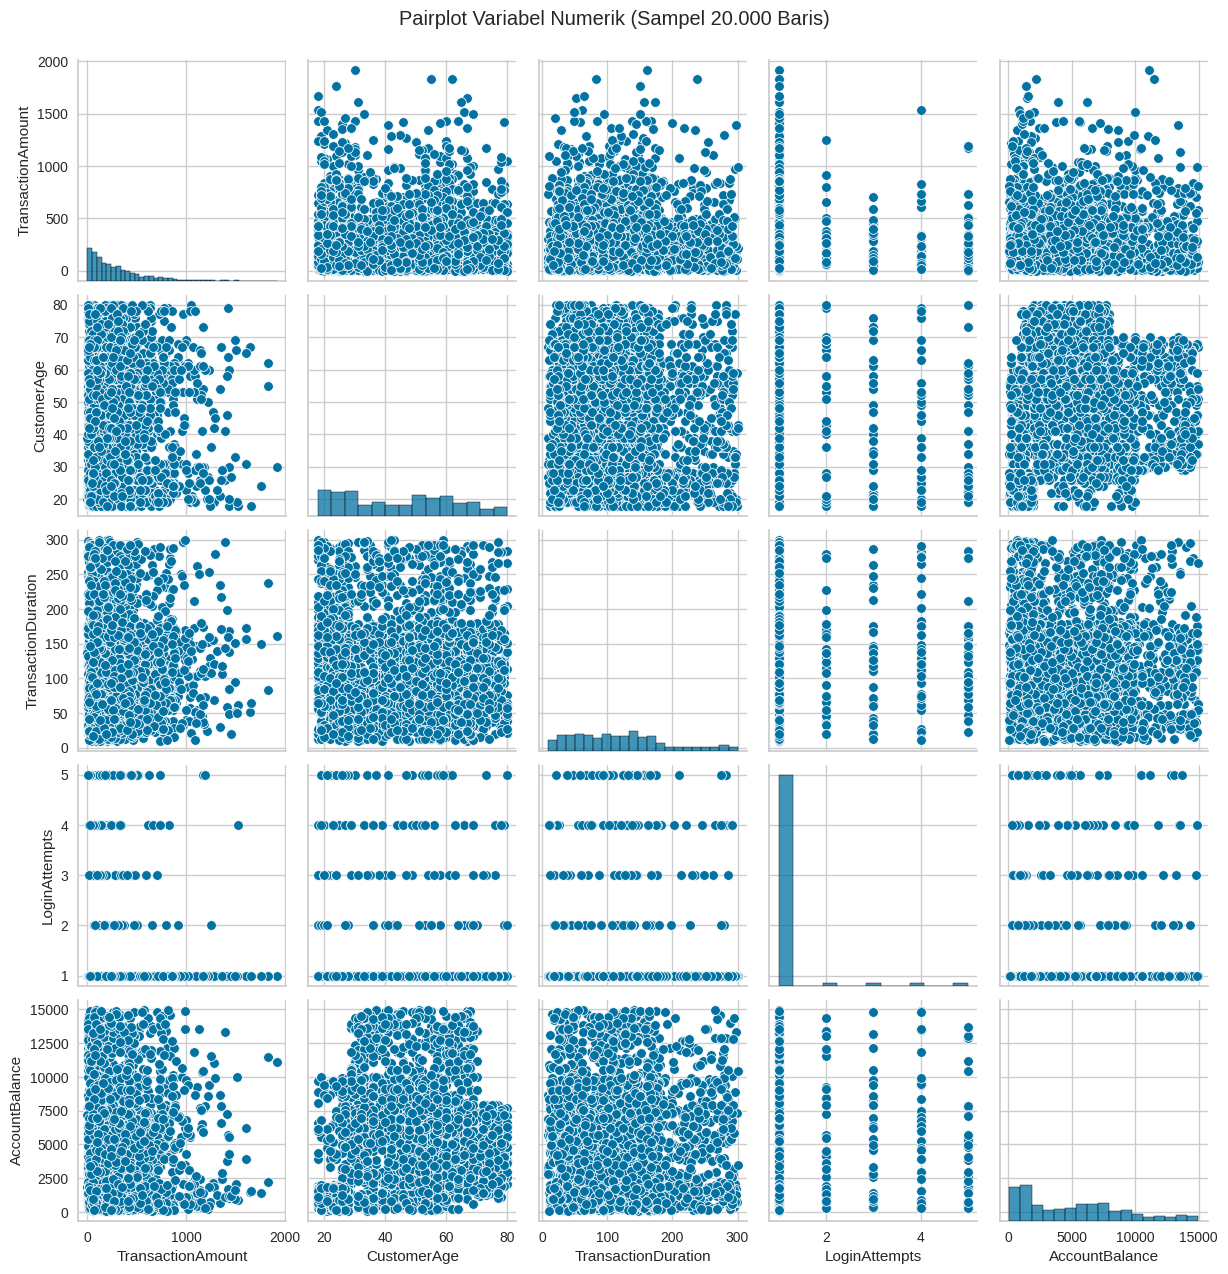

In [ ]:
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairplot Variabel Numerik (Sampel 20.000 Baris)", y=1.02)
plt.show()

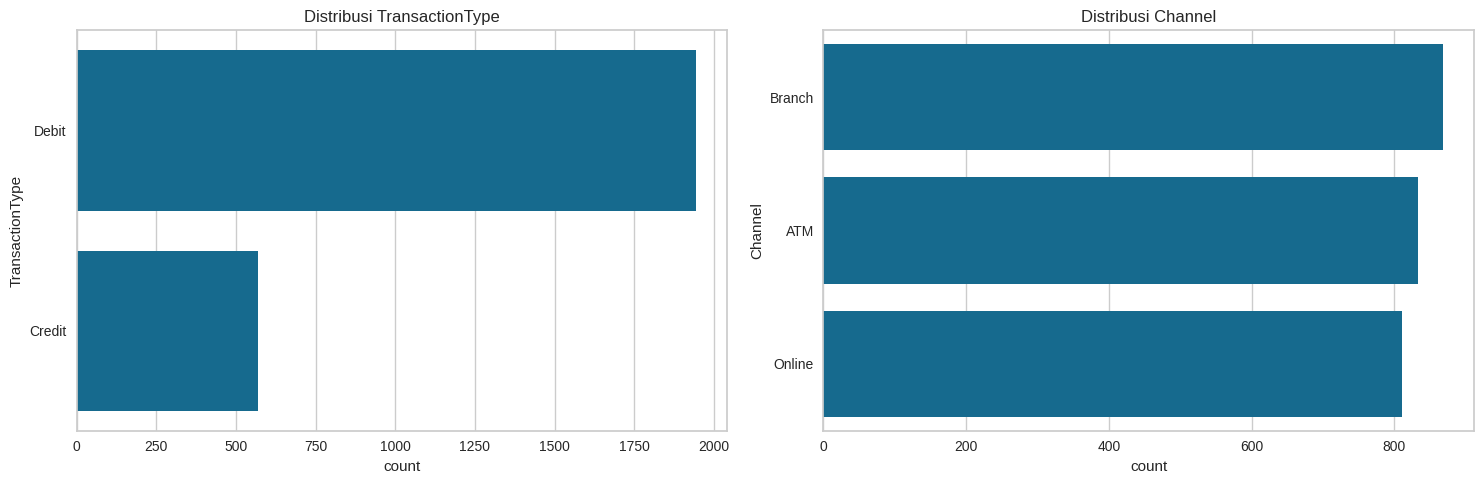

In [ ]:
categorical_columns = ['TransactionType', 'Channel']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, col in enumerate(categorical_columns):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


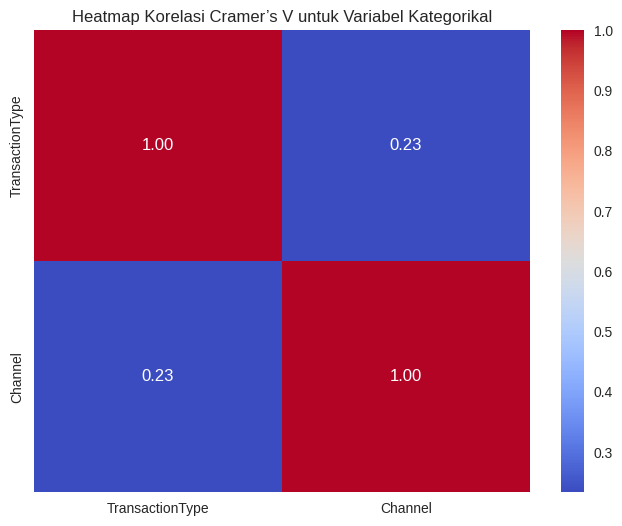

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cat_columns = ['TransactionType', 'Channel']
cramers_v_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)

for col1 in cat_columns:
    for col2 in cat_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Heatmap Korelasi Cramer’s V untuk Variabel Kategorikal")
plt.show()

# **5. Data Preprocessing**

In [ ]:
df_cleaned = df.copy()

In [ ]:
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge', 'TransactionType', 'Channel']
df_cleaned = df_cleaned[features]

In [ ]:
df_cleaned.isnull().sum()

,0
TransactionAmount,0
TransactionDuration,0
AccountBalance,0
CustomerAge,0
TransactionType,0
Channel,0


In [ ]:
df_cleaned.duplicated().sum()

np.int64(0)

In [ ]:
columns_to_filter = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']


print("Jumlah outlier sebelum filtering:")
for col in columns_to_filter:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier(s)")

print("\nJumlah data sebelum menghapus outlier:", len(df_cleaned))

Jumlah outlier sebelum filtering:
TransactionAmount column: 113 outlier(s)
TransactionDuration column: 0 outlier(s)
AccountBalance column: 0 outlier(s)
CustomerAge column: 0 outlier(s)

Jumlah data sebelum menghapus outlier: 2512


In [ ]:
df_filtered = df_cleaned.copy()

for col in columns_to_filter:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

df_cleaned = df_filtered

In [ ]:
print("Jumlah data setelah menghapus outlier:", len(df_cleaned))

print("\nJumlah outlier setelah filtering:")
for col in columns_to_filter:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier(s)")

Jumlah data setelah menghapus outlier: 2399

Jumlah outlier setelah filtering:
TransactionAmount column: 51 outlier(s)
TransactionDuration column: 0 outlier(s)
AccountBalance column: 0 outlier(s)
CustomerAge column: 0 outlier(s)


In [ ]:
categorical_columns = ['TransactionType', 'Channel']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(df_cleaned[categorical_columns])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

In [ ]:
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(df_cleaned[numerical_columns])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_columns)

In [ ]:
df_cleaned = pd.concat([numerical_df, categorical_df], axis=1)
df_cleaned

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online
0,0.015317,0.838710,0.244828,0.336832,0.0,1.0,1.0,0.0,0.0
1,0.416400,0.806452,0.451724,0.918055,0.0,1.0,1.0,0.0,0.0
2,0.139579,0.016129,0.158621,0.068637,0.0,1.0,0.0,0.0,1.0
3,0.204047,0.129032,0.051724,0.569198,0.0,1.0,0.0,0.0,1.0
4,0.014608,0.129032,0.648276,0.492591,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2394,0.947969,0.241935,0.341379,0.846257,1.0,0.0,0.0,1.0,0.0
2395,0.278294,0.483871,0.575862,0.010318,0.0,1.0,0.0,1.0,0.0
2396,0.031420,0.612903,0.468966,0.220590,0.0,1.0,0.0,1.0,0.0
2397,0.205675,0.080645,0.031034,0.112636,0.0,1.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [ ]:
X = df_cleaned.iloc[:, [0, 1, 2, 3, 4, 5]].values
print(pd.DataFrame(X, columns=['TransactionAmount',	'CustomerAge',	'TransactionDuration',	'AccountBalance',	'TransactionType_Credit',	'TransactionType_Debit']))

      TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0              0.015317     0.838710             0.244828        0.336832   
1              0.416400     0.806452             0.451724        0.918055   
2              0.139579     0.016129             0.158621        0.068637   
3              0.204047     0.129032             0.051724        0.569198   
4              0.014608     0.129032             0.648276        0.492591   
...                 ...          ...                  ...             ...   
2394           0.947969     0.241935             0.341379        0.846257   
2395           0.278294     0.483871             0.575862        0.010318   
2396           0.031420     0.612903             0.468966        0.220590   
2397           0.205675     0.080645             0.031034        0.112636   
2398           0.268925     0.096774             0.286207        0.002017   

      TransactionType_Credit  TransactionType_Debit  
0                    

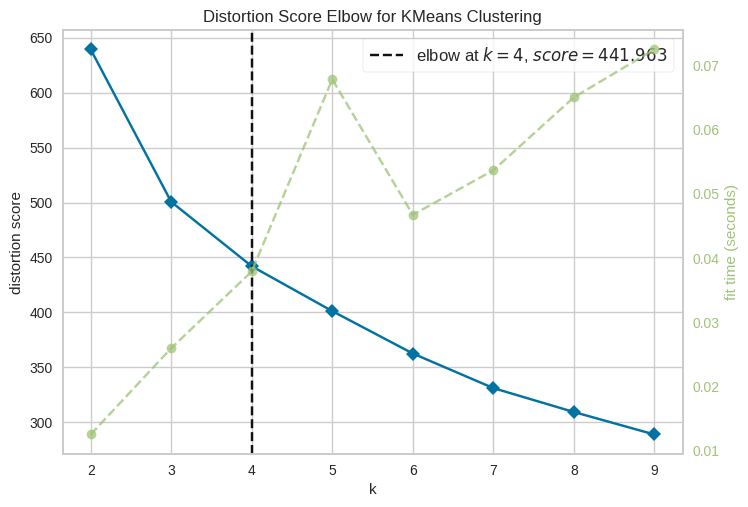

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10))

visualizer.fit(X)

visualizer.show()

## **b. Evaluasi Model Clustering**

In [ ]:
kmeans_before = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans_before.fit_predict(df_cleaned)

In [ ]:
silhouette_avg = silhouette_score(df_cleaned, labels)
print(f'Silhouette Score sebelum feature selection: {silhouette_avg :.2f}')

Silhouette Score sebelum feature selection: 0.49


## **c. Feature Selection (Opsional)**

In [ ]:
selector = SelectKBest(mutual_info_classif, k=6)
X = selector.fit_transform(df_cleaned, np.zeros(df_cleaned.shape[0]))

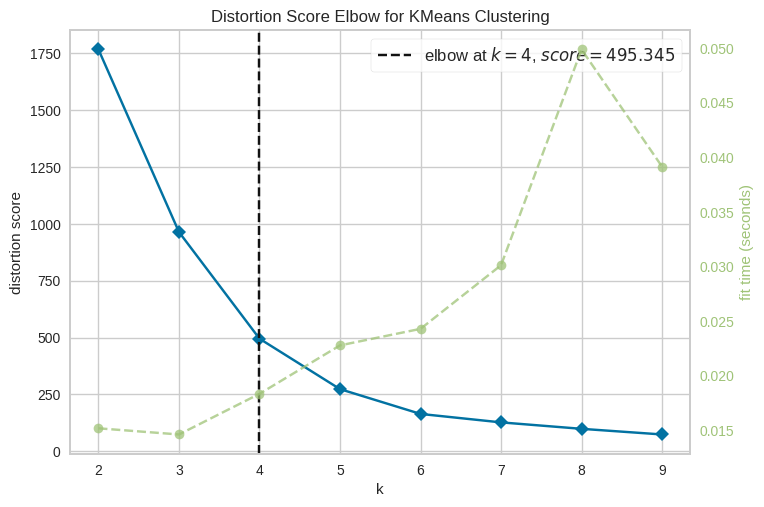

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10))

visualizer.fit(X)

visualizer.show()

In [ ]:
kmeans_after = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans_after.fit_predict(X)

In [ ]:
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score setelah feature selection: {silhouette_avg :.2f}')

Silhouette Score setelah feature selection: 0.76


## **d. Visualisasi Hasil Clustering**

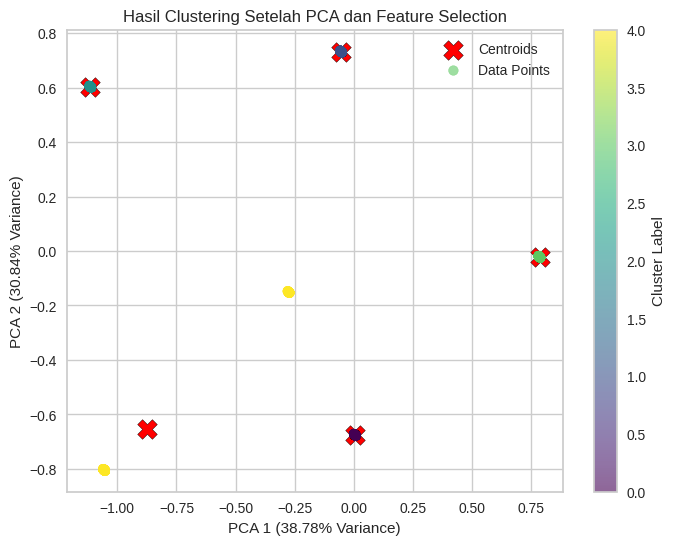

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans_after.cluster_centers_)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, edgecolors='black', label="Centroids")

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, label="Data Points")

plt.colorbar(scatter, label="Cluster Label")

plt.xlabel(f'PCA 1 ({explained_variance[0]:.2%} Variance)')
plt.ylabel(f'PCA 2 ({explained_variance[1]:.2%} Variance)')
plt.title('Hasil Clustering Setelah PCA dan Feature Selection')

plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
df_normalized = df_cleaned.copy()

In [ ]:
df_normalized['Cluster'] = kmeans_after.labels_

In [ ]:
decoded_categories = encoder.inverse_transform(categorical_encoded)
decoded_df = pd.DataFrame(decoded_categories, columns=categorical_columns)

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [ ]:
original_numerical = scaler.inverse_transform(numerical_scaled)
original_numerical_df = pd.DataFrame(original_numerical, columns=numerical_columns)

In [ ]:
df_normalized = pd.concat([decoded_df, original_numerical_df], axis=1)

df_normalized['Cluster'] = kmeans_after.labels_

df_normalized['CustomerAge'] = df_normalized['CustomerAge'].astype(int)

df_normalized

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster
0,Debit,ATM,14.09,70,81.0,5112.21,3
1,Debit,ATM,376.24,68,141.0,13758.91,3
2,Debit,Online,126.29,19,56.0,1122.35,0
3,Debit,Online,184.50,26,25.0,8569.06,0
4,Credit,Online,13.45,26,198.0,7429.40,4
...,...,...,...,...,...,...,...
2394,Credit,Branch,856.21,33,109.0,12690.79,2
2395,Debit,Branch,251.54,48,177.0,254.75,1
2396,Debit,Branch,28.63,56,146.0,3382.91,1
2397,Debit,Online,185.97,23,19.0,1776.91,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
df_normalized.groupby('Cluster')[df_normalized.select_dtypes(include='number').columns].mean().astype({'CustomerAge': 'int', 'Cluster': 'int'})

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster
Cluster,,,,,
0,255.681815,43,119.966667,4883.642296,0
1,238.480304,43,115.856419,5292.817669,1
2,286.736708,46,114.753086,5029.695103,2
3,256.395403,45,122.356944,5133.808722,3
4,259.149836,45,123.197368,5401.191678,4


In [ ]:
df_normalized.groupby('Cluster')[df_normalized.select_dtypes(include='object').columns].value_counts()

Cluster  TransactionType  Channel
0        Debit            Online     540
1        Debit            Branch     592
2        Credit           Branch     243
3        Debit            ATM        720
4        Credit           Online     233
                          ATM         71
Name: count, dtype: int64

In [ ]:
df_normalized.groupby('Cluster').agg(lambda x: x.mode()[0])

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance
Cluster,,,,,,
0,Debit,Online,16.73,28,68.0,101.25
1,Debit,Branch,28.38,27,63.0,117.98
2,Credit,Branch,3.30,28,44.0,105.01
3,Debit,ATM,29.22,27,88.0,112.76
4,Credit,Online,425.18,26,137.0,125.85


##Interpretasi Hasil Clustering
1. Cluster 0:

  Kelompok ini cenderung melakukan transaksi debit secara online. Mayoritas berusia 43 tahun dengan jumlah transaksi rata-rata 255.68. Durasi transaksi yang paling umum adalah 68 detik.

2. Cluster 1:

  Preferensi utama kelompok ini adalah transaksi debit di cabang bank. Rata-rata usia 43 tahun dengan transaksi sebesar 238.48. Durasi transaksi yang sering terjadi adalah 63 detik.

3. Cluster 2:
  
  Kelompok ini lebih memilih menggunakan kartu kredit di cabang bank. Rata-rata usia 46 tahun, jumlah transaksi 286.73, dan durasi transaksi paling sering adalah 44 detik.

4. Cluster 3:

  Lebih banyak melakukan transaksi debit melalui ATM dibandingkan online atau di cabang. Rata-rata usia 45 tahun, jumlah transaksi 256.39, dengan durasi transaksi umum 88 detik.

5. Cluster 4:
  
  Kelompok ini didominasi oleh pengguna kartu kredit untuk transaksi online. Rata-rata usia 45 tahun, jumlah transaksi 259.15, dan durasi transaksi yang paling sering adalah 137 detik.



## Analisis Karakteristik Cluster (Model KMeans)
1. **Cluster 0:**
- Rata-rata transaksi: 255.68
- Rata-rata usia pelanggan: 43 tahun
- Durasi transaksi rata-rata: 119.97 detik
- Saldo rata-rata akun: 4883.64
- Modus transaksi: Debit
- Modus kanal: Online
- Analisis: Kelompok ini lebih memilih transaksi online dengan kartu debit, kemungkinan karena kemudahan akses e-commerce dan pembayaran digital.



2. **Cluster 1:**
- Rata-rata transaksi: 238.48
- Rata-rata usia pelanggan: 43 tahun
- Durasi transaksi rata-rata: 115.86 detik
- Saldo rata-rata akun: 5292.82
- Modus transaksi: Debit
- Modus kanal: Branch
- Analisis: Pelanggan dalam cluster ini lebih nyaman bertransaksi langsung di bank. Mereka mungkin kurang percaya pada transaksi digital atau membutuhkan bantuan langsung dari petugas bank.



3. **Cluster 2:**
- Rata-rata transaksi: 286.73
- Rata-rata usia pelanggan: 46 tahun
- Durasi transaksi rata-rata: 114.75 detik
- Saldo rata-rata akun: 5029.70
- Modus transaksi: Kredit
- Modus kanal: Branch
- Analisis: Kelompok ini lebih memilih menggunakan kartu kredit di cabang bank, mungkin karena membutuhkan otorisasi tambahan atau layanan langsung dari petugas.



4. **Cluster 3:**
- Rata-rata transaksi: 256.40
- Rata-rata usia pelanggan: 45 tahun
- Durasi transaksi rata-rata: 122.36 detik
- Saldo rata-rata akun: 5133.81
- Modus transaksi: Debit
- Modus kanal: ATM
- Analisis: Pelanggan dalam kelompok ini lebih nyaman menggunakan ATM untuk tarik tunai atau transfer manual, menunjukkan ketergantungan pada uang tunai.



5. **Cluster 4:**
- Rata-rata transaksi: 259.15
- Rata-rata usia pelanggan: 45 tahun
- Durasi transaksi rata-rata: 123.20 detik
- Saldo rata-rata akun: 5401.19
- Modus transaksi: Kredit
- Modus kanal: Online
- Analisis: Kelompok ini aktif menggunakan kartu kredit untuk transaksi online, menunjukkan daya beli yang tinggi serta kecenderungan untuk sering berbelanja online.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_normalized.to_csv('Bank_Transactions_Clustering_Dataset.csv', index=False)

In [ ]:
from google.colab import files
files.download('Bank_Transactions_Clustering_Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>